    In general, we can follow a general EDA checklist:
.Examine the top and bottom of the data
.Examine the data's dimensions
.Examine the datatypes and missing values
.Investigate statistical properties of the data
.Create plots of the data

In [4]:
import pandas as pd
from sqlalchemy import create_engine

In [10]:
csv_file = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\itunes_data.csv")
xlsx_file = pd.read_excel(r"C:\Users\David gathara marigi\Downloads\itunes_data.xlsx", engine ='openpyxl')
engine = create_engine(r"sqlite:///C:\Users\David gathara marigi\Downloads\chinook.db")
query = """SELECT tracks.name as Track, 
tracks.composer, 
tracks.milliseconds,
tracks.bytes, 
tracks.unitprice,
genres.name as Genre,
albums.title as Album,
artists.name as Artist
FROM tracks
JOIN genres ON tracks.genreid = genres.genreid
JOIN albums ON tracks.albumid = albums.albumid
JOIN artists ON albums.artistid = artists.artistid;
"""
with engine.connect() as connection:
    sql_df = pd.read_sql_query(query, connection)
i_tunes = pd.concat([csv_file, xlsx_file, sql_df]) 
i_tunes.tail()


,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [11]:
print(i_tunes.iloc[0])
print(i_tunes.iloc[-1])

Track           All the Best Cowboys Have Daddy Issues
Composer                                           NaN
Milliseconds                                   2555492
Bytes                                        211743651
UnitPrice                                         1.99
Genre                                         TV Shows
Album                                   Lost, Season 1
Artist                                            Lost
Name: 0, dtype: object
Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 350

In [12]:
print(i_tunes.iloc[0, 0])
print(i_tunes.iloc[-1, -1])

All the Best Cowboys Have Daddy Issues
Philip Glass Ensemble


In [13]:
print(i_tunes.loc[3502])

Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 3502, dtype: object


In [15]:
test_df = i_tunes.copy()
test_df = pd.concat([test_df, pd.DataFrame([i_tunes.loc[3502]])])
test_df.loc[3502]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [17]:
test_df.reset_index(inplace=True, drop=True)
print(test_df)


                                                  Track  \
0                All the Best Cowboys Have Daddy Issues   
1                                             Beira Mar   
2                                                Brasil   
3                                          Ben Franklin   
4                          O Último Romântico (Ao Vivo)   
...                                                 ...   
4017  String Quartet No. 12 in C Minor, D. 703 "Quar...   
4018               L'orfeo, Act 3, Sinfonia (Orchestra)   
4019  Quintet for Horn, Violin, 2 Violas, and Cello ...   
4020                                      Koyaanisqatsi   
4021                                      Koyaanisqatsi   

                               Composer  Milliseconds      Bytes  UnitPrice  \
0                                   NaN       2555492  211743651       1.99   
1                          Gilberto Gil        295444    9597994       0.99   
2     Milton Nascimento, Fernando Brant        155428 

In [18]:
i_tunes['Milliseconds']

0       2555492
1        295444
2        155428
3       1271938
4        231993
         ...   
3498     286741
3499     139200
3500      66639
3501     221331
3502     206005
Name: Milliseconds, Length: 4021, dtype: int64

In [20]:
i_tunes[['Milliseconds', 'Bytes', 'Genre']]

,Milliseconds,Bytes,Genre
0,2555492,211743651,TV Shows
1,295444,9597994,Latin
2,155428,5252560,Latin
3,1271938,264168080,Comedy
4,231993,7692697,Latin
...,...,...,...
3498,286741,4718950,Classical
3499,139200,2283131,Classical
3500,66639,1189062,Classical
3501,221331,3665114,Classical


                      Examining the data's dimensions, datatypes, and missing values

In [21]:
print(i_tunes.shape)

(4021, 8)


In [22]:
i_tunes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4021 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  4021 non-null   int64  
 3   Bytes         4021 non-null   int64  
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 411.8+ KB


In [23]:
i_tunes.isna().sum()    

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

                                 Investigating statistical properties of the data

In [24]:
i_tunes.describe()

,Milliseconds,Bytes,UnitPrice
count,4.021000e+03,4.021000e+03,4021.000000
mean,3.927276e+05,3.311048e+07,1.050184
std,5.337745e+05,1.042268e+08,0.237857
min,1.071000e+03,3.874700e+04,0.990000
25%,2.069680e+05,6.372433e+06,0.990000
50%,2.554770e+05,8.102839e+06,0.990000
75%,3.217240e+05,1.025143e+07,0.990000
max,5.286953e+06,1.059546e+09,1.990000


In [25]:
i_tunes['Genre'].mode()

0    Rock
Name: Genre, dtype: object

In [28]:
i_tunes['Genre'].value_counts()

Genre
Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Sci Fi & Fantasy        31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: count, dtype: int64

In [29]:
i_tunes['Genre'].value_counts().head(5)

Genre
Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Name: count, dtype: int64

In [30]:
i_tunes['Genre'].value_counts()[:5]

Genre
Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Name: count, dtype: int64

In [31]:
i_tunes['Artist'].unique().shape


(204,)

In [33]:
i_tunes.select_dtypes(include="number").corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.957791,0.934829
Bytes,0.957791,1.000000,0.938734
UnitPrice,0.934829,0.938734,1.000000


                             Plotting with DataFrames

In [34]:
import matplotlib.pyplot as plt


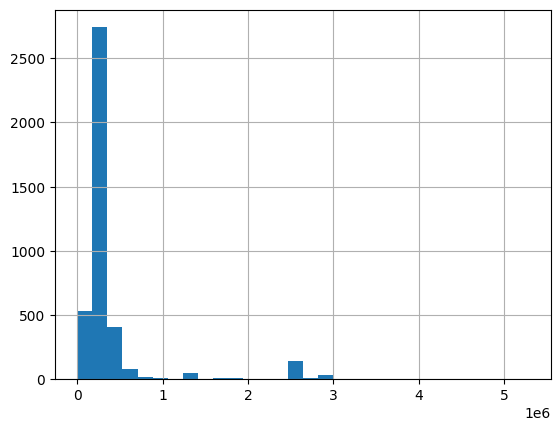

In [35]:
i_tunes['Milliseconds'].hist(bins=30)
plt.show()

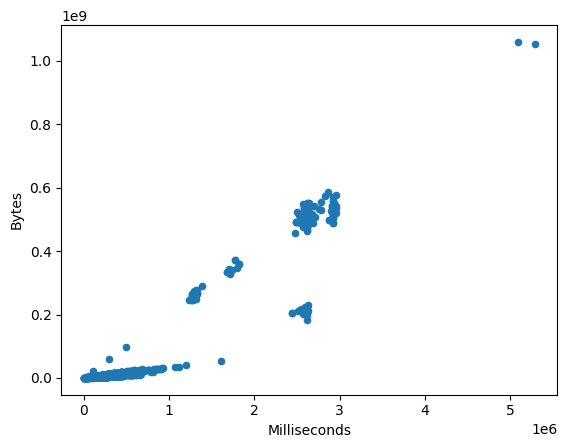

In [36]:
i_tunes.plot.scatter(x='Milliseconds', y='Bytes')
plt.show()

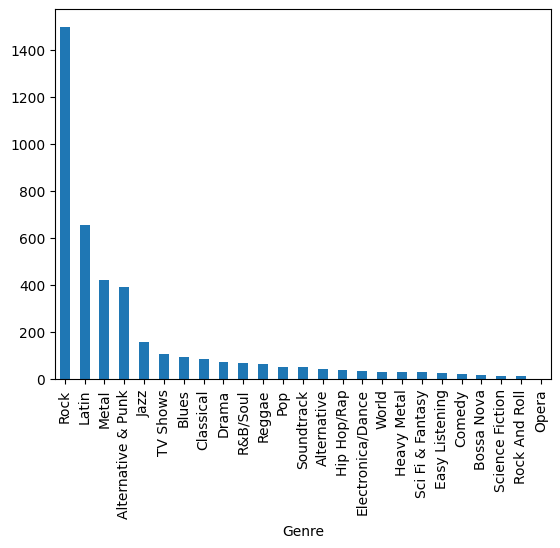

In [37]:
i_tunes['Genre'].value_counts().plot.bar()
plt.show()


                                             cleaning data

Some common data cleaning steps include:
. Removing irrelevant data
. Dealing with missing values (filling in or dropping them)
. Dealing with outliers
. Dealing with duplicate values
. Ensuring datatypes are correct
. Standardizing data formats (e.g. mismatched capitalization, converting units)